---
### Python Project for Data Science
### Kyungchan Im
### 2024-01-09
---

Full Points: Working code that yields correct results

You will be graded on the dashboards displaying the specified data and the screenshots you took during the final project lab <br> questions. There are 12 possible points for this assignment. Here is the breakdown:

Question 1 - Extracting Tesla Stock Data Using yfinance - 2 Points <br>
Question 2 - Extracting Tesla Revenue Data Using Webscraping - 1 Points <br>
Question 3 - Extracting GameStop Stock Data Using yfinance - 2 Points <br>
Question 4 - Extracting GameStop Revenue Data Using Webscraping - 1 Points <br>
Question 5 - Tesla Stock and Revenue Dashboard - 2 Points <br>
Question 6 - GameStop Stock and Revenue Dashboard - 2 Points <br>
Question 7 - Sharing your Assignment Notebook - 2 Points <br>

For each problem points will be awarded as follows:

Full Points: Working code that yields correct results <br>
Partial Points: Partially correct code or results <br>
No Points: Did not attempt the problem or did not upload any solution

In [1]:
# Import Packages
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
# Import Warning method to ignore warnings from older version of packages
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
# Dashboard Generator Function
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()


---
### Question 1 - Extracting Tesla Stock Data Using yfinance - 2 Points

In [4]:
# Get Tesla Stock Data
tesla = yf.Ticker("TSLA")

tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)

In [5]:
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


---
### Question 2 - Extracting Tesla Revenue Data Using Webscraping - 1 Points

In [6]:
# Get Url and Revenue Data
tesla_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
tesla_html_data = requests.get(tesla_url).text

# Parsing the html data using beautiful_soup
soup = BeautifulSoup(tesla_html_data, 'html5lib')
tesla_revenue_data = pd.read_html(str(soup))
tesla_revenue = tesla_revenue_data[1]
tesla_revenue.head()

,Tesla Quarterly Revenue (Millions of US $),Tesla Quarterly Revenue (Millions of US $).1
0,2022-09-30,"$21,454"
1,2022-06-30,"$16,934"
2,2022-03-31,"$18,756"
3,2021-12-31,"$17,719"
4,2021-09-30,"$13,757"


In [62]:
# Change the column names
tesla_revenue.columns = ["Date", "Revenue"]

In [63]:
# Data Cleansing
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].str.replace(',|\$',"",  regex=True)

# Drop NAs and empty strings
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [12]:
tesla_revenue.tail()

,Tesla Quarterly Revenue (Millions of US $),Tesla Quarterly Revenue (Millions of US $).1
49,2010-06-30,$28
50,2010-03-31,$21
51,2009-12-31,NaN
52,2009-09-30,$46
53,2009-06-30,$27


---
### Question 3 - Extracting GameStop Stock Data Using yfinance - 2 Points

In [10]:
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)

In [11]:
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


---
### Question 4 - Extracting GameStop Revenue Data Using Webscraping - 1 Points

In [13]:
gme_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
gme_html_data = requests.get(gme_url).text

# Parsing the html data using beautiful_soup
soup = BeautifulSoup(gme_html_data, 'html5lib')
gme_revenue_data = pd.read_html(str(soup))
gme_revenue = gme_revenue_data[1]
gme_revenue.head()

,GameStop Quarterly Revenue (Millions of US $),GameStop Quarterly Revenue (Millions of US $).1
0,2020-04-30,"$1,021"
1,2020-01-31,"$2,194"
2,2019-10-31,"$1,439"
3,2019-07-31,"$1,286"
4,2019-04-30,"$1,548"


In [68]:
gme_revenue.columns = ["Date", "Revenue"]

In [69]:
# Data Cleansing
gme_revenue['Revenue'] = gme_revenue['Revenue'].str.replace(',|\$',"",  regex=True)

# Drop NAs and empty strings
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]

In [14]:
gme_revenue.tail()

,GameStop Quarterly Revenue (Millions of US $),GameStop Quarterly Revenue (Millions of US $).1
57,2006-01-31,"$1,667"
58,2005-10-31,$534
59,2005-07-31,$416
60,2005-04-30,$475
61,2005-01-31,$709


---
### Question 5 - Tesla Stock and Revenue Dashboard - 2 Points <br>

In [71]:
make_graph(tesla_data, tesla_revenue, 'Tesla')

/var/folders/18/2sgs664j525fq83lhrdhr14c0000gn/T/ipykernel_3617/1756339522.py:6: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

/var/folders/18/2sgs664j525fq83lhrdhr14c0000gn/T/ipykernel_3617/1756339522.py:7: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



---
### Question 6 - GameStop Stock and Revenue Dashboard- 2 Points <br>

In [72]:
make_graph(gme_data, gme_revenue, 'GameStop')

/var/folders/18/2sgs664j525fq83lhrdhr14c0000gn/T/ipykernel_3617/1756339522.py:6: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

/var/folders/18/2sgs664j525fq83lhrdhr14c0000gn/T/ipykernel_3617/1756339522.py:7: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



---
### Question 7 - Sharing your Assignment Notebook - 2 Points

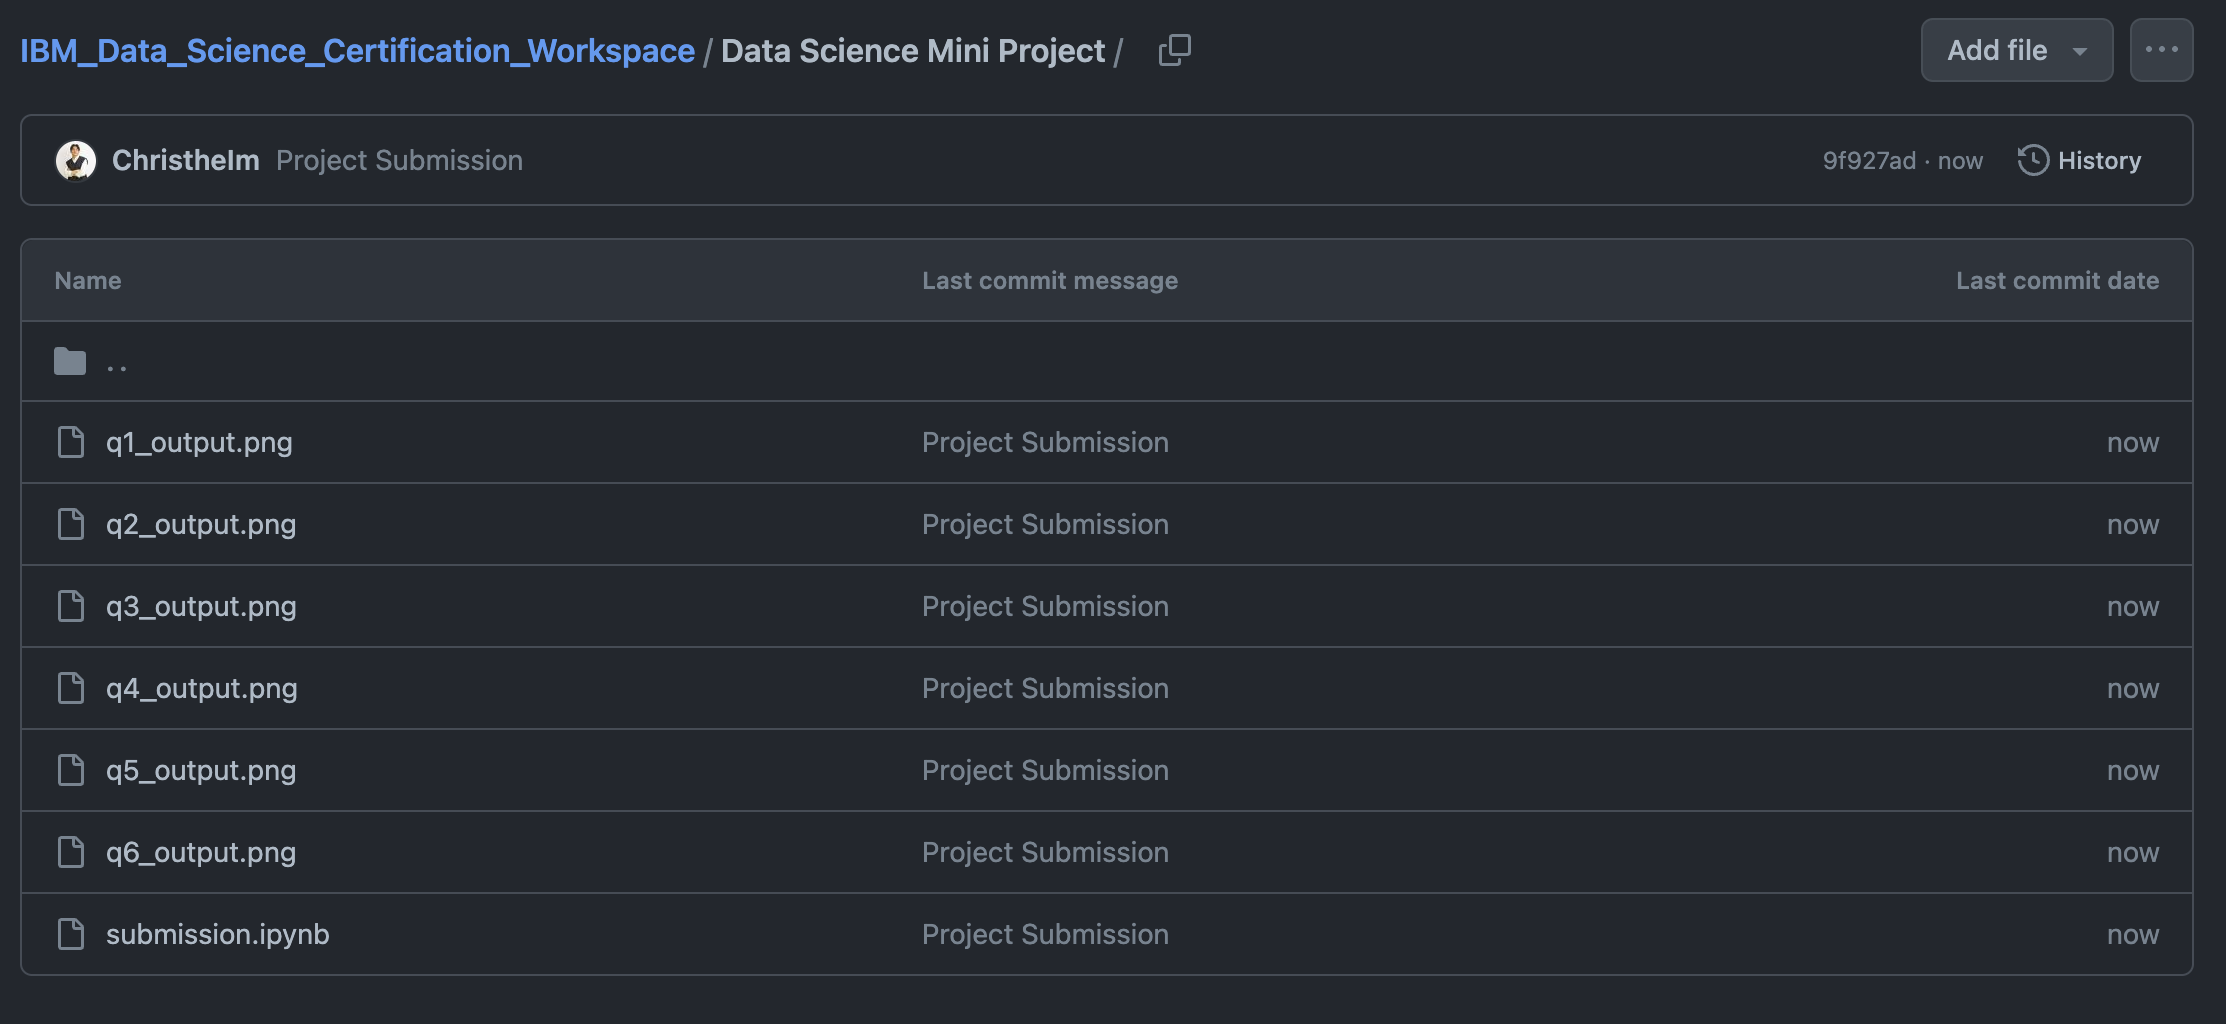

In [15]:
from IPython.display import Image
Image(filename='q7_output.png') 